## Block Neural Autoregressive Flow
Block neural autoregressive flows are useful for training a density estimator, when sampling is not required.

In [1]:
from jax import random
import jax.numpy as jnp
from flowjax.flows import BlockNeuralAutoregressiveFlow
from flowjax.train_utils import train_flow
import matplotlib.pyplot as plt
key = random.PRNGKey(0)


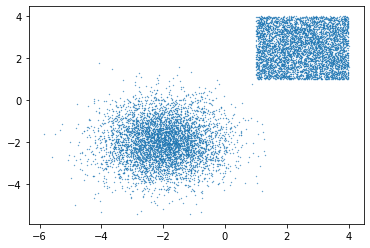

In [2]:
n = 10000
key, *subkeys = random.split(key, 3)
x1 = random.normal(subkeys[0], (n//2, 2)) - 2
x2 = random.uniform(subkeys[1], (n//2, 2))*3 + 1
x = jnp.row_stack((x1, x2))
plt.scatter(x[:, 0], x[:, 1], s=0.1)

In [3]:
key, subkey = random.split(key)
flow = BlockNeuralAutoregressiveFlow(key, 2)
key, subkey = random.split(key)
flow, _ = train_flow(subkey, flow, x, learning_rate=0.05, max_epochs=50, max_patience=10)

100%|██████████| 50/50 [00:21<00:00,  2.31it/s, train=3.31, val=3.34]


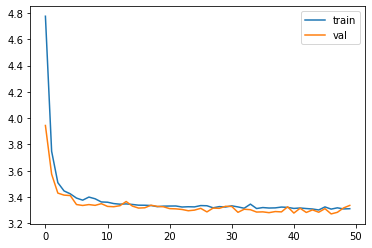

In [4]:
for k, v in _.items():
    plt.plot(v, label=k)
plt.legend()
plt.show()

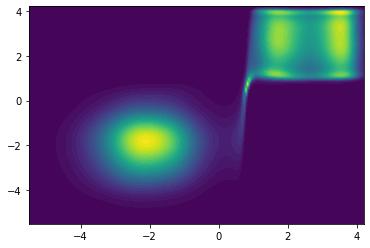

In [5]:
resolution = 200
xline = jnp.linspace(-5.5, 4.2, resolution)
yline = jnp.linspace(-5.5, 4.2, resolution)
xgrid, ygrid = jnp.meshgrid(xline, yline)
xyinput = jnp.column_stack((xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)))
zgrid = jnp.exp(flow.log_prob(xyinput).reshape(resolution, resolution))

import numpy as onp
grids = [onp.array(g) for g in [xgrid, ygrid, zgrid]]
plt.contourf(*grids, levels=40)
plt.show()
